# LAB EXTRA 1
### Hecho por: Joshua Sancho y Steven Solís

## Importar Librerías

In [1]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

## Carga del Dataset

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    r'dataset/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32
)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.


In [3]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'dataset/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 10 classes.


## Visualización de los Datos

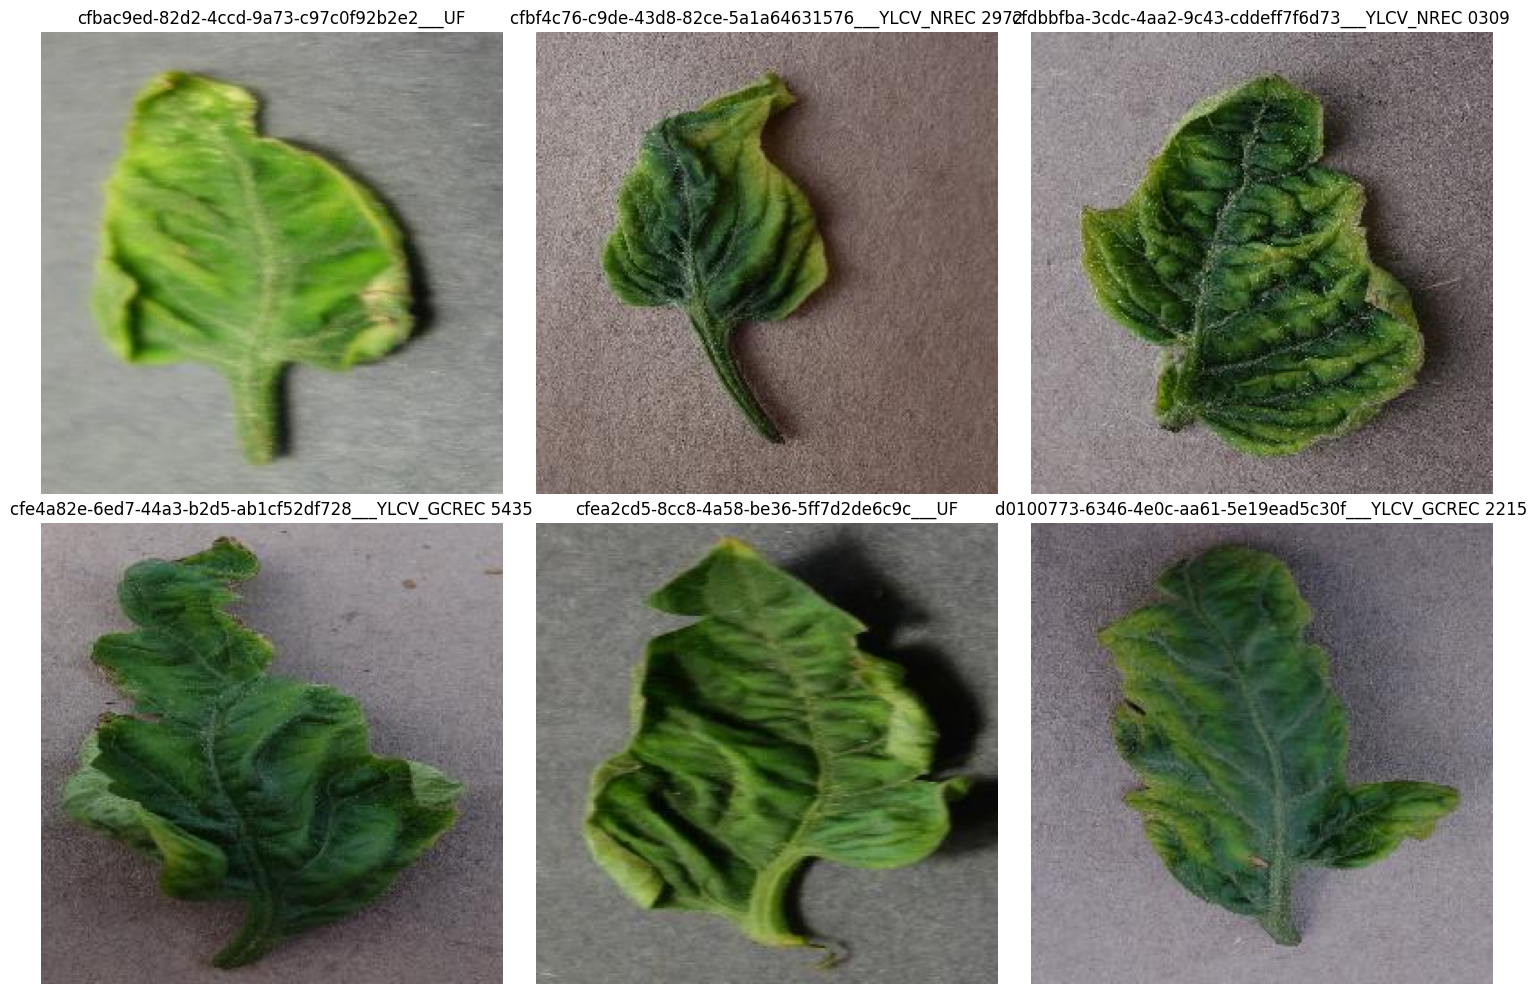

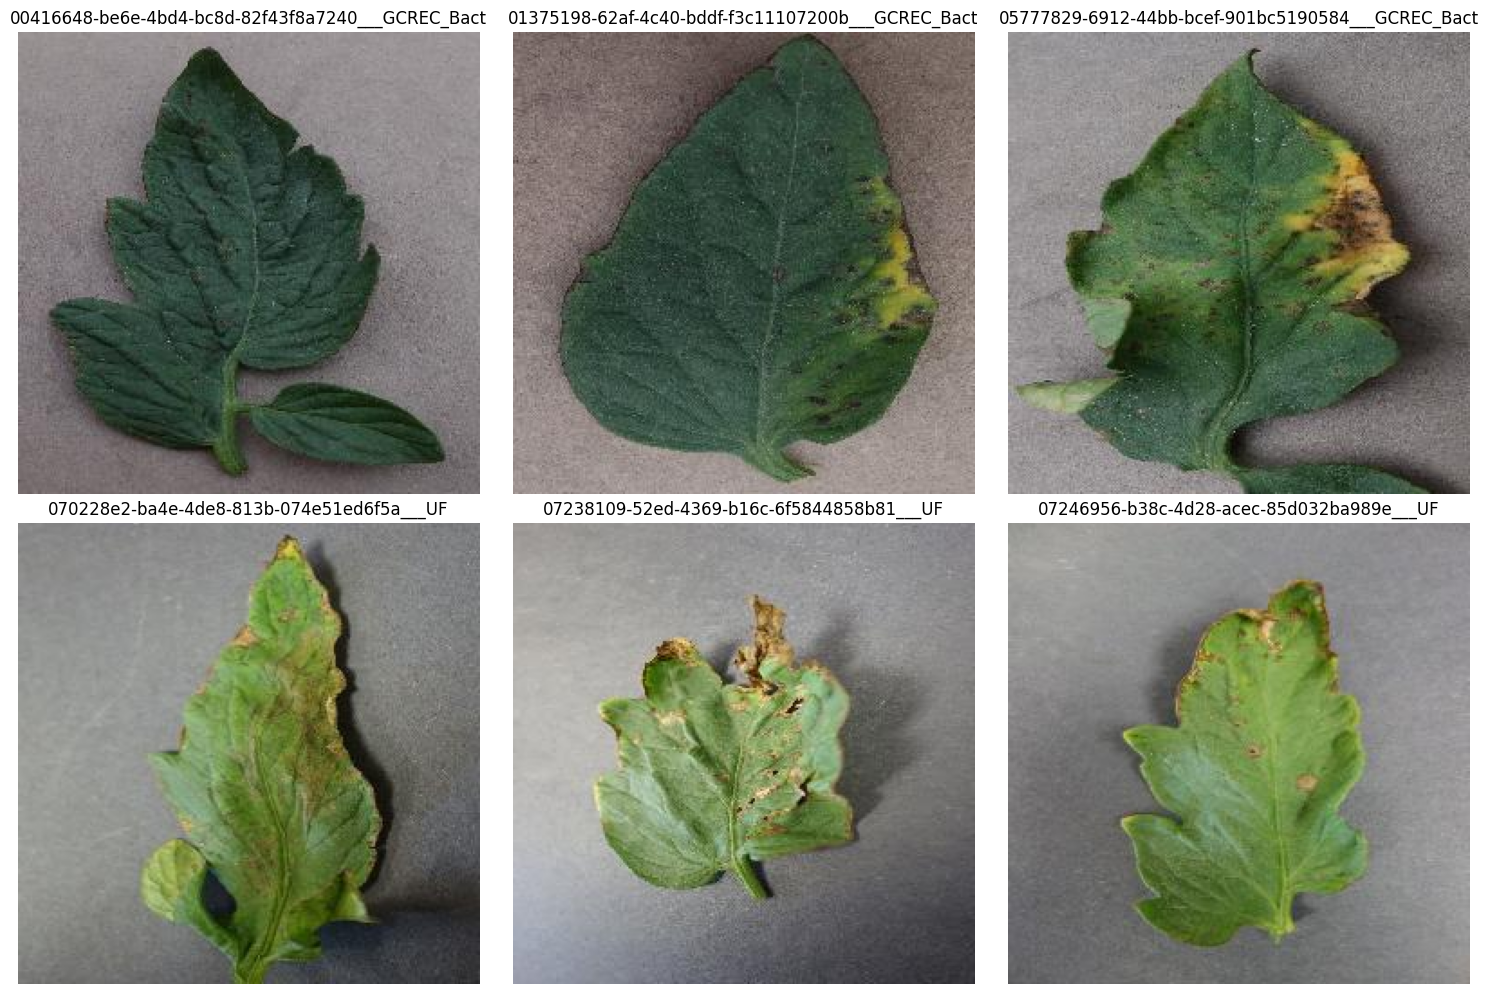

In [4]:
def plot_images(path):
    # Get a list of all image file names in the directory
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    # Display the first 6 images with their labels
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(min(6, len(image_files))):
        # Get the image file name and its label
        image_file = image_files[i]
        label = image_file.split('.')[0]

        # Load and display the image
        img_path = os.path.join(path, image_file)
        img = mpimg.imread(img_path)
        ax = axs[i // 3, i % 3]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)

    plt.tight_layout()
    plt.show()

plot_images(r"dataset/train/yellow_leaf_curl_virus")
plot_images(r"dataset/train/bacterial_spot")

# Entrenamiento del Modelo

In [5]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [6]:
conv_base.trainable = False

In [7]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
313/313 [==============================] - 34s 87ms/step - loss: 1.4470 - accuracy: 0.5195 - val_loss: 1.8263 - val_accuracy: 0.4700
Epoch 2/100
313/313 [==============================] - 25s 81ms/step - loss: 0.7040 - accuracy: 0.7775 - val_loss: 2.1701 - val_accuracy: 0.5240
Epoch 3/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5045 - accuracy: 0.8397 - val_loss: 2.4880 - val_accuracy: 0.5460
Epoch 4/100
313/313 [==============================] - 26s 82ms/step - loss: 0.4001 - accuracy: 0.8692 - val_loss: 2.6998 - val_accuracy: 0.5540
Epoch 5/100
313/313 [==============================] - 26s 82ms/step - loss: 0.3246 - accuracy: 0.8972 - val_loss: 2.8570 - val_accuracy: 0.5620
Epoch 6/100
313/313 [==============================] - 26s 82ms/step - loss: 0.2761 - accuracy: 0.9116 - val_loss: 3.0532 - val_accuracy: 0.5620
Epoch 7/100
313/313 [==============================] - 26s 83ms/step - loss: 0.2437 - accuracy: 0.9214 - val_loss: 3.1716 - val_ac

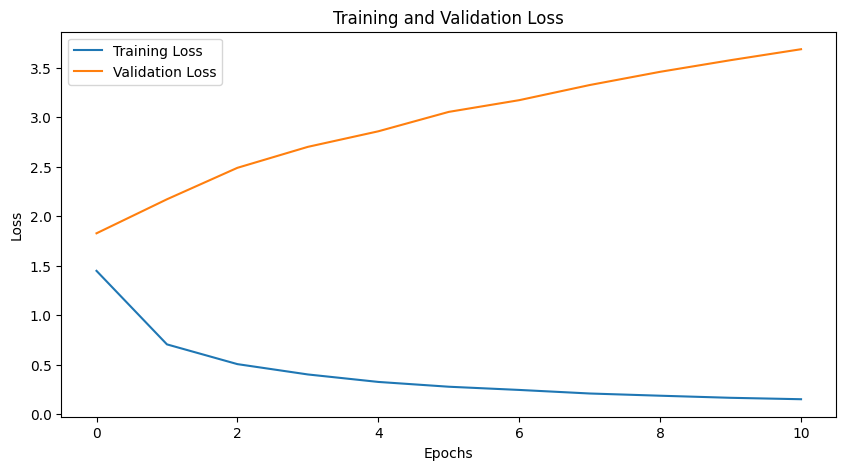

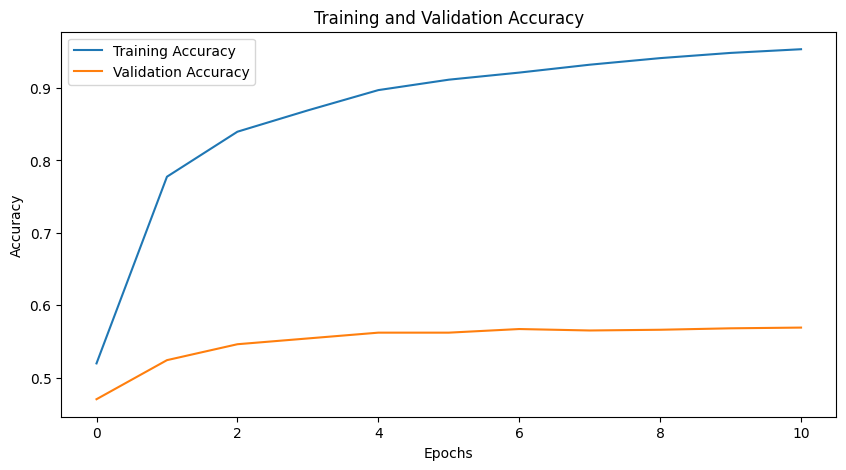

In [10]:
# Get training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

# Get validation history
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluación

In [11]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 [==============================] - 2s 71ms/step - loss: 3.6863 - accuracy: 0.5690
Validation Loss: 3.6862900257110596
Validation Accuracy: 0.5690000057220459


## Conclusión

El modelo parece tener un rendimiento razonable en el conjunto de validación, con una precisión cercana al 57%. Sin embargo, la pérdida relativamente alta sugiere que aún hay margen de mejora en términos de la capacidad del modelo para hacer predicciones más precisas.